# Descriptive statistics problems

### Exercise 1

We will use NumPy to obtain information to describe statistically.

- Generate an array of 100 elements following a normal distribution.
- Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
- Calculate the main metrics and statistical measures that best describe the two vectors.

Text(0.5, 0, 'Rango de valor de un indice')

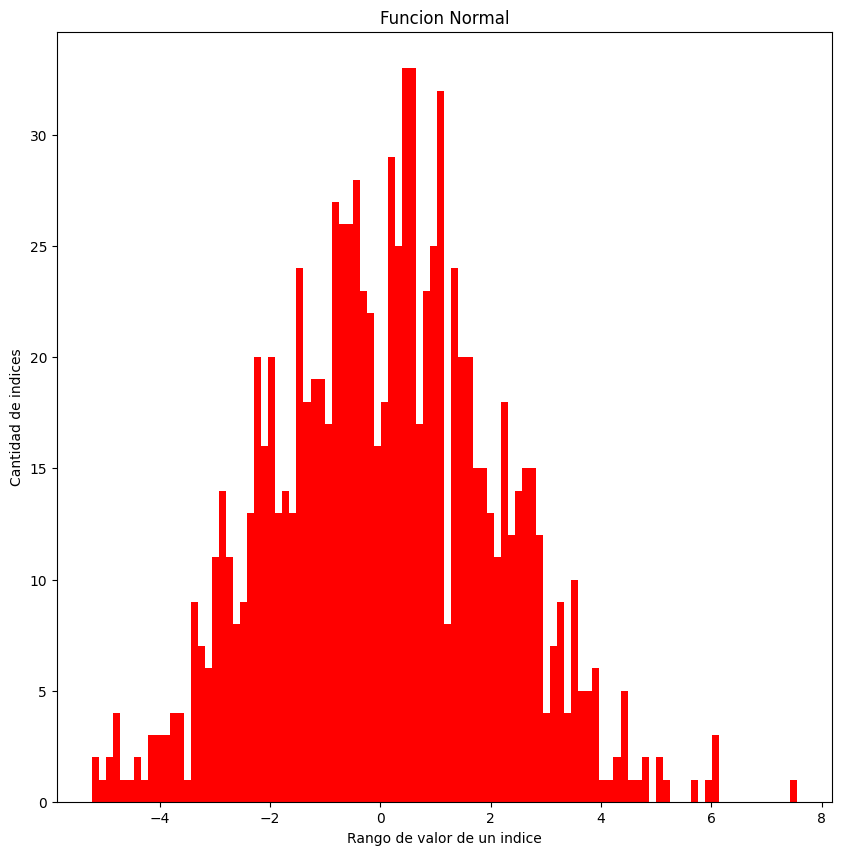

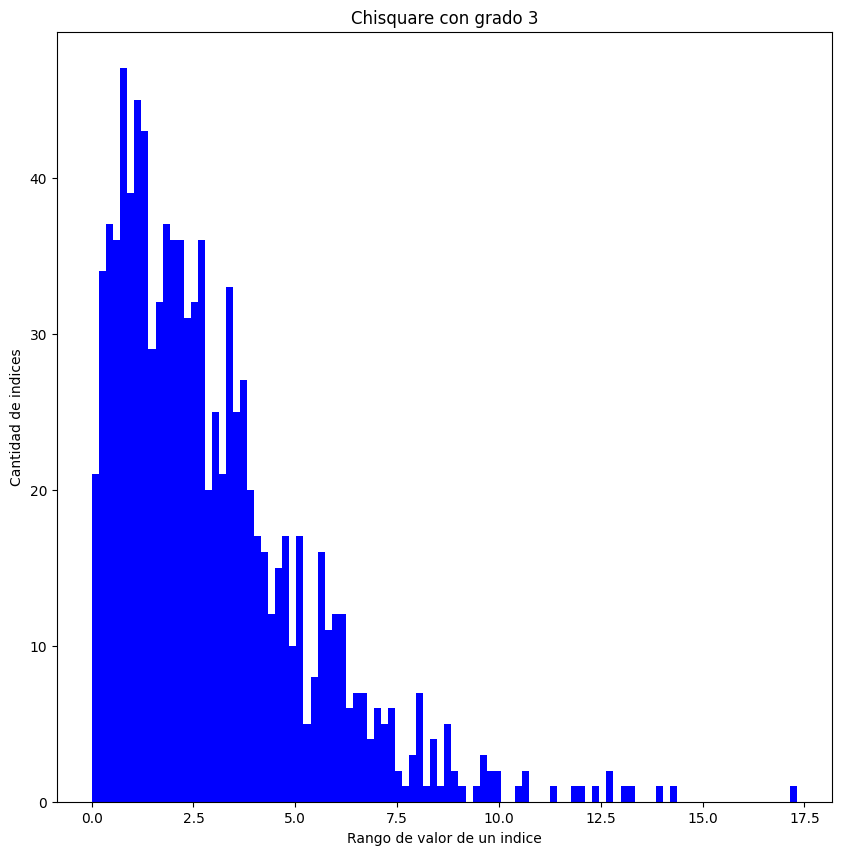

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a1 = np.random.normal(loc=0.0, scale=2.0, size=1000)
a2 = np.random.chisquare(3, 1000)
df1 = pd.DataFrame(a1)
df2 = pd.DataFrame(a2)
plt.figure(figsize=(10, 10))
plt.hist(df1, bins=100, color='red')
plt.title('Funcion Normal')
plt.ylabel("Cantidad de indices")
plt.xlabel('Rango de valor de un indice')
plt.figure(figsize=(10,10))
plt.hist(df2, bins=100, color='blue')
plt.title('Chisquare con grado 3')
plt.ylabel("Cantidad de indices")
plt.xlabel('Rango de valor de un indice')

### Exercise 2

Write a Python program to calculate the standard deviation of the following data:

```py
data = [4, 2, 5, 8, 6]
```

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a1 = np.random.normal(loc=0.0, scale=1.0, size=1000)
a2 = np.random.chisquare(3, 100)
df1 = pd.DataFrame(a1)
df2 = pd.DataFrame(a2)
list1=[4, 2, 5, 8, 6]
data1 = np.array(list1)
df3 = pd.DataFrame(data1)
print(pd.DataFrame.describe(df3))
df3std = df3.std()
df3std.index.name = 'STD'
df3std.columns = ['Standard deviation']
print(df3std)




              0
count  5.000000
mean   5.000000
std    2.236068
min    2.000000
25%    4.000000
50%    5.000000
75%    6.000000
max    8.000000
STD
0    2.236068
dtype: float64
